## Предобработка данных и логистическая регрессия для задачи бинарной классификации

В задании вам будет предложено ознакомиться с основными техниками предобработки данных, а так же применить их для обучения модели логистической регрессии. Ответ потребуется загрузить в соответствующую форму в виде 6 текстовых файлов.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Описание датасета

Задача: по 38 признакам, связанных с заявкой на грант (область исследований учёных, информация по их академическому бэкграунду, размер гранта, область, в которой он выдаётся) предсказать, будет ли заявка принята. Датасет включает в себя информацию по 6000 заявкам на гранты, которые были поданы в университете Мельбурна в период с 2004 по 2008 год.

Полную версию данных с большим количеством признаков можно найти на https://www.kaggle.com/c/unimelb.

In [4]:
cd C:\Users\vlad\1. Machine Learning\Yandex Specialization\2.Learning on Labeled Data\Data

C:\Users\vlad\1. Machine Learning\Yandex Specialization\2.Learning on Labeled Data\Data


In [5]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

Выделим из датасета целевую переменную Grant.Status и обозначим её за ```y```

Теперь ```x``` обозначает обучающую выборку, ```y``` - ответы на ней

In [6]:
x = data.drop('Grant.Status', 1)
y = data['Grant.Status']

## Теория по логистической регрессии

После осознания того, какую именно задачу требуется решить на этих данных, следующим шагом при реальном анализе был бы подбор подходящего метода. В данном задании выбор метода было произведён за вас, это логистическая регрессия. Кратко напомним вам используемую модель.

Логистическая регрессия предсказывает вероятности принадлежности объекта к каждому классу. Сумма ответов логистической регрессии на одном объекте для всех классов равна единице.

$$ \sum_{k=1}^K \pi_{ik} = 1, \quad \pi_k \equiv P\,(y_i = k \mid x_i, \theta), $$

где:
- $\pi_{ik}$ - вероятность принадлежности объекта $x_i$ из выборки $X$ к классу $k$
- $\theta$ - внутренние параметры алгоритма, которые настраиваются в процессе обучения, в случае логистической регрессии - $w, b$

Из этого свойства модели в случае бинарной классификации требуется вычислить лишь вероятность принадлежности объекта к одному из классов (вторая вычисляется из условия нормировки вероятностей). Эта вероятность вычисляется, используя логистическую функцию:

$$ P\,(y_i = 1 \mid x_i, \theta) = \frac{1}{1 + \exp(-w^T x_i-b)} $$

Параметры $w$ и $b$ находятся, как решения следующей задачи оптимизации (указаны функционалы с L1 и L2 регуляризацией, с которыми вы познакомились в предыдущих заданиях):

L2-regularization:

$$ Q(X, y, \theta) = \frac{1}{2} w^T w + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

L1-regularization:

$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

$C$ - это стандартный гиперпараметр модели, который регулирует то, насколько сильно мы позволяем модели подстраиваться под данные.

## Предобработка данных

Из свойств данной модели следует, что:
- все $X$ должны быть числовыми данными (в случае наличия среди них категорий, их требуется некоторым способом преобразовать в вещественные числа)
- среди $X$ не должно быть пропущенных значений (т.е. все пропущенные значения перед применением модели следует каким-то образом заполнить)

Поэтому базовым этапом в предобработке любого датасета для логистической регрессии будет **кодирование категориальных признаков**, а так же **удаление или интерпретация пропущенных значений** (при наличии того или другого).

In [7]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


Видно, что в датасете есть как числовые, так и категориальные признаки. Получим списки их названий:

In [8]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(x.columns.values.tolist()) - set(numeric_cols))

Также в нём присутствуют пропущенные значения. Очевидны решением будет исключение всех данных, у которых пропущено хотя бы одно значение. Сделаем это:

In [9]:
# data.dropna().shape

Видно, что тогда мы выбросим почти все данные, и такой метод решения в данном случае не сработает.

Пропущенные значения можно так же интерпретировать, для этого существует несколько способов, они различаются для категориальных и вещественных признаков.

Для вещественных признаков:
- заменить на 0 (данный признак давать вклад в предсказание для данного объекта не будет)
- заменить на среднее (каждый пропущенный признак будет давать такой же вклад, как и среднее значение признака на датасете)

Для категориальных:
- интерпретировать пропущенное значение, как ещё одну категорию (данный способ является самым естественным, так как в случае категорий у нас есть уникальная возможность не потерять информацию о наличии пропущенных значений; обратите внимание, что в случае вещественных признаков данная информация неизбежно теряется)

##  Задание 1 Обработка пропущенных значений
1. Заполните пропущенные вещественные значения в X нулями и средними по столбцам, назовите полученные датафреймы ```x_real_zeros``` и ```x_real_mean``` соответственно. Для подсчёта средних используйте описанную ниже функцию ```calculate_means()```, которой требуется передать на вход вешественные признаки из исходного датафрейма. 

**Для подсчета среднего можно использовать функцию ```pandas.mean()```**

2. Все категориальные признаки в ```x``` преобразуйте в строки, пропущенные значения требуется также преобразовать в какие-либо строки, которые не являются категориями (например, ```'NA'```), полученный датафрейм назовите ```x_cat```

Для объединения выборок здесь и далее в задании рекомендуется использовать функции

    np.hstack(...)
    np.vstack(...)

In [10]:
# Заполняем пропуски нулями для вещественных признаков
# x_real_zeros = pd.DataFrame()
# for column in x[numeric_cols].columns.values:
#     x_real_zeros[column] = x[column].apply(lambda val: 0 if pd.isnull(val) else val)
    
# Cамый простой способ
x_real_zeros = x[numeric_cols].fillna(0)

In [11]:
# Заполняем пропуски средним по столбцам для вещественных признаков, используя функцию pd.mean()
x_real_mean = pd.DataFrame()
for column in x[numeric_cols].columns.values:
    column_mean = x[column].mean()
    x_real_mean[column] = x[column].apply(lambda val: column_mean if pd.isnull(val) else val)

In [12]:
# Чистим категориальные признаки. Создаем NaN как категорию
"""
Была ошибка: ненулевые значения не были преобразованы к формату str. Следовательно, каждый категориальный признак 
был по сути бинарным (т.е. NaN или нет). Следовательно, качество на валидации страдало существенно ~ 55%.
После устрониния, получили качество в 88% !!!

"""

x_cat = pd.DataFrame()
for column in x[categorical_cols].columns.values:
    x_cat[column] = x[column].apply(lambda val: 'NaN' if pd.isnull(val) else str(val))
    
# Самый простой способ
# x_cat = x[categorical_cols].fillna('NA').astype(str)

## Преобразование категориальных признаков

В предыдущей ячейке мы разделили наш датасет ещё на две части: в одной присутствуют только вещественные признаки, в другой только категориальные. Это понадобится нам для раздельной последующей обработке этих данных, а так же для сравнения качества работы тех или иных методов.

Для использования модели регрессии требуется преобразовать категориальные признаки в вещественные. Рассмотрим основной способ преоборазования категориальных признаков в вещественные: ```one-hot encoding```. Его идея заключается в том, что мы преобразуем категориальный признак при помощи бинарного кода: каждой категории ставим в соответствие набор из нулей и единиц.

Посмотрим, как данный метод работает на простом наборе данных.

In [13]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Закодированные данные:

[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


Как видно, в первые три колонки оказалась закодированна информация о стране, а во вторые две - о поле. При этом для совпадающих элементов выборки строки будут полностью совпадать. Также из примера видно, что кодирование признаков сильно увеличивает их количество, но полностью сохраняет информацию, в том числе о наличии пропущенных значений (их наличие просто становится одним из бинарных признаков в преобразованных данных).

Теперь применим ```one-hot encoding``` к категориальным признакам из исходного датасета. Обратите внимание на общий для всех методов преобработки данных интерфейс. Функция

```encoder.fit_transform(x)```
    
позволяет вычислить необходимые параметры преобразования, впоследствии к новым данным можно уже применять функцию

```encoder.transform(x)```
    
Очень важно применять одинаковое преобразование как к обучающим, так и тестовым данным, потому что в противном случае вы получите непредсказуемые, и, скорее всего, плохие результаты. В частности, если вы отдельно закодируете обучающую и тестовую выборку, то получите вообще говоря разные коды для одних и тех же признаков, и ваше решение работать не будет.

Также параметры многих преобразований (например, рассмотренное ниже **масштабирование**) **нельзя вычислять одновременно на данных из обучения и теста**, потому что иначе подсчитанные на тесте метрики качества будут давать смещённые оценки на качество работы алгоритма. Кодирование категориальных признаков не считает на обучающей выборке никаких параметров, поэтому его можно применять сразу к всему датасету.

In [14]:
# Теперь мы можем применить one_hot_encoding, т.к. выполнен препроцессинг категориальных переменных
encoder = DV(sparse = False)
x_cat_one_hot = encoder.fit_transform(x_cat.T.to_dict().values())

Для построения метрики качества по результату обучения требуется разделить исходный датасет на обучающую и тестовую выборки.

Обращаем внимание на заданный параметр для генератора случайных чисел: random_state. Так как результаты на обучении и тесте будут зависеть от того, как именно вы разделите объекты, то предлагается использовать заранее определённое значение для получение результатов, согласованных с ответами в системе проверки заданий.

In [15]:
from sklearn.model_selection import train_test_split

# Для выборки где заполняли пропуски нулями
x_train_real_zeros, x_test_real_zeros, y_train, y_test = train_test_split(x_real_zeros, y, test_size = 0.3, random_state = 0)

# Для выборки где пропуски заменяли средним
x_train_real_mean, x_test_real_mean = train_test_split(x_real_mean, test_size = 0.3, random_state = 0)

# Только для категорий
x_train_one_hot, x_test_one_hot = train_test_split(x_cat_one_hot, test_size = 0.3, random_state = 0)

In [16]:
# Объеденим выборки:
# С нулевыми заполненными значениями
x_train_zeros = np.hstack((x_train_real_zeros, x_train_one_hot)) # (train)
x_test_zeros = np.hstack((x_test_real_zeros, x_test_one_hot)) # (test)

# Cо средними нулевыми значениями
x_train_mean = np.hstack((x_train_real_mean, x_train_one_hot)) # (train)
x_test_mean = np.hstack((x_test_real_mean, x_test_one_hot)) # (test)

In [17]:
# Чтобы не расписывать каждый раз создадим функцию объединения 2-х выборок
def concat_samples_h(left, right):
    return np.hstack((left, right))

## Описание классов

Итак, мы получили первые наборы данных, для которых выполнены оба ограничения логистической регрессии на входные данные. Обучим на них регрессию, используя имеющийся в библиотеке ```sklearn``` функционал по подбору гиперпараметров модели:
    
```optimizer = GridSearchCV(estimator, param_grid)```

где:
- ```estimator``` - обучающий алгоритм, для которого будет производиться подбор параметров
- ```param_grid``` - словарь параметров, ключами которого являются строки-названия, которые передаются алгоритму ```estimator```, а значения - набор параметров для перебора

Данный класс выполняет кросс-валидацию обучающей выборки для каждого набора параметров и находит те, на которых алгоритм работает лучше всего. Этот метод позволяет настраивать гиперпараметры по обучающей выборке, избегая переобучения. Некоторые опциональные параметры вызова данного класса, которые нам понадобятся:
- ```scoring``` - функционал качества, максимум которого ищется кросс валидацией, по умолчанию используется функция ```score()``` класса ```esimator```
- ```n_jobs``` - позволяет ускорить кросс-валидацию, выполняя её параллельно, число определяет количество одновременно запущенных задач
- ```cv``` - количество фолдов, на которые разбивается выборка при кросс-валидации

После инициализации класса ```GridSearchCV```, процесс подбора параметров запускается следующим методом:

```optimizer.fit(X, y)```
    
На выходе для получения предсказаний можно пользоваться функцией для меток

```optimizer.predict(X)```
    
или для вероятностей (**в случае использования логистической регрессии**)

```optimizer.predict_proba(X)```
    
Также можно напрямую получить оптимальный класс ```estimator``` и оптимальные параметры, так как они является атрибутами класса ```GridSearchCV```:
- ```best_estimator_``` - лучший алгоритм
- ```best_params_``` - лучший набор параметров

Класс логистической регрессии выглядит следующим образом:

```estimator = LogisticRegression(penalty)```
   
```penalty``` принимает либо значение ```l2```, либо ```l1```. По умолчанию устанавливается значение ```l2```, и везде в задании, если об этом не оговорено особо, предполагается использование логистической регрессии с ```L2``` регуляризацией.

## Задание 2 Сравнение способов заполнения вещественных пропущенных значений
1. Составьте две обучающие выборки из вещественных и категориальных признаков: в одной вещественные признаки, где пропущенные значения заполнены нулями, в другой - средними. Рекомендуется записывать в выборки сначала вещественные, а потом категориальные признаки.
<br><br>
2. Обучите на них логистическую регрессию, подбирая параметры из заданной сетки ```param_grid``` по методу кросс-валидации с числом фолдов ```cv=3```. **При обучении использовать параметр ```solver='liblinear'``` в этом и последующих заданиях ноутбука.**
<br><br>
3. Постройте два графика оценок точности +- их стандратного отклонения в зависимости от гиперпараметра и убедитесь, что вы действительно нашли её максимум. Также обратите внимание на большую дисперсию получаемых оценок (уменьшить её можно увеличением числа фолдов ```cv```).
<br><br>
4. Получите две метрики качества ```AUC ROC``` на тестовой выборке и сравните их между собой. Какой способ заполнения пропущенных вещественных значений работает лучше? В дальнейшем для выполнения задания в качестве вещественных признаков используйте ту выборку, которая даёт лучшее качество на тесте.
<br><br>
5. Передайте два значения ```AUC ROC``` (сначала для выборки, заполненной средними, потом для выборки, заполненной нулями) в функцию ```write_answer_1``` и запустите её. Полученный файл является ответом на 1 задание.
<br><br>
Информация для интересующихся: вообще говоря, не вполне логично оптимизировать на кросс-валидации заданный по умолчанию в классе логистической регрессии функционал accuracy, а измерять на тесте AUC ROC, но это, как и ограничение размера выборки, сделано для ускорения работы процесса кросс-валидации.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    C_params = [row['C'] for row in optimizer.cv_results_['params']] # Храним все значения гиперпараметра С
    mean_test_score = optimizer.cv_results_['mean_test_score'] # Качество на тестовом фолде
    std_test_score = optimizer.cv_results_['std_test_score'] # Std 
    # Рисуем Линию
    plt.fill_between(C_params,
                     mean_test_score - std_test_score, # mean_test_score + std
                     mean_test_score + std_test_score, # mean_test_score - std
                     alpha = 0.3)
    plt.semilogx(C_params, mean_test_score) # Масштбируем ось X к logX  
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(auc))

In [19]:
def fit_model_and_get_auc(train_x_set, train_y_set, test_x_set, test_y_set, grid_param = None):
    # Cоздаем экземпляр модели
    log_reg_model = LogisticRegression()
    # Создаем сетку GridSearch в которой перебираем параметры и кросс - валидируемся на n фолдах
    grid_search = GridSearchCV(log_reg_model, **grid_param)
    grid_search.fit(train_x_set, train_y_set)
    # Отображаем лучшую модель и лучшие сочетание параметров
    print('Лучшее сочетание параметров модели:')
    print(grid_search.best_params_)
    # График зависимсоти разного гиперпараметра C от качества
    plot_scores(grid_search)
    # Финальный score на тесте
    auc_score = roc_auc_score(test_y_set, grid_search.best_estimator_.predict_proba(test_x_set)[:, 1])
    return auc_score

Лучшее сочетание параметров модели:
{'C': 0.05, 'solver': 'liblinear'}


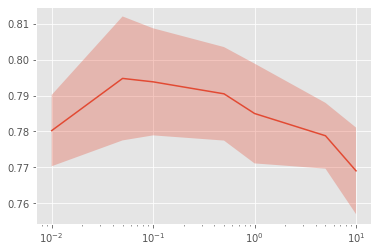

0.8843724749458951


In [20]:
# Для нулевой замены

# Определяем параметры сетки
model_params = {
             'param_grid':{'solver': ['liblinear'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             'n_jobs': -1,
             'cv': 3
            }
            
        
zero_auc = fit_model_and_get_auc(x_train_zeros, y_train, x_test_zeros, y_test, grid_param = model_params)
print(zero_auc)

Лучшее сочетание параметров модели:
{'C': 0.1, 'solver': 'liblinear'}


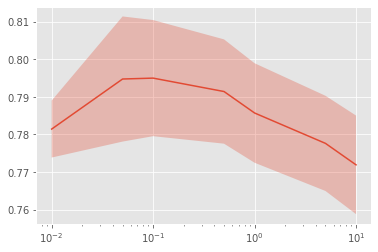

0.8879708123853093


In [21]:
# Для замены средними значениями
mean_auc = fit_model_and_get_auc(x_train_mean, y_train, x_test_mean, y_test, grid_param = model_params)
print(mean_auc)

In [22]:
# Сравним метрики на моделях с разными методами заполнения пропущенных значений 
print(f'AUC Using Mean Values: {zero_auc}\nAUC Using Zero Values: {mean_auc}')

AUC Using Mean Values: 0.8843724749458951
AUC Using Zero Values: 0.8879708123853093


Можно заметить, что заполнение пропусков средним значением увеличило score модели 

In [26]:
# Сохраняем результат 
write_answer_1(mean_auc, zero_auc)

## Масштабирование вещественных признаков

Попробуем как-то улучшить качество классификации. Для этого посмотрим на сами данные:

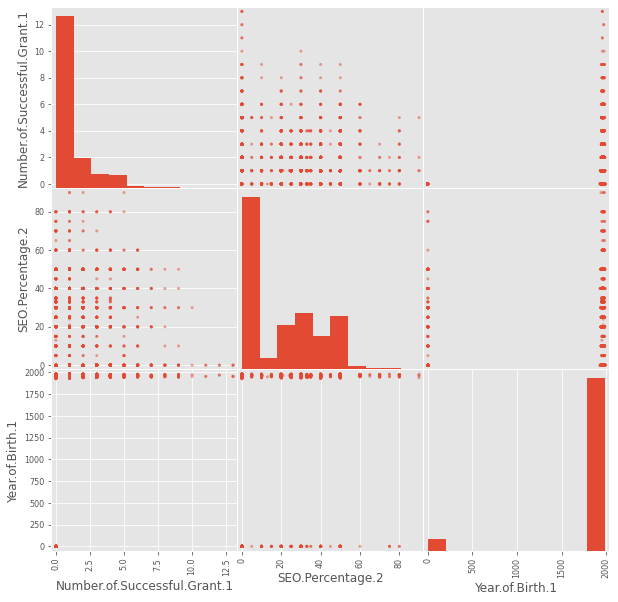

In [27]:
data_numeric = pd.DataFrame(x_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
pd.plotting.scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Как видно из графиков, разные признаки очень сильно отличаются друг от друга по модулю значений (обратите внимание на диапазоны значений осей x и y). В случае обычной регрессии это никак не влияет на качество обучаемой модели, т.к. у меньших по модулю признаков будут большие веса, но при использовании регуляризации, которая штрафует модель за большие веса, регрессия, как правило, начинает работать хуже.

В таких случаях всегда рекомендуется делать стандартизацию (масштабирование) признаков, для того чтобы они меньше отличались друг друга по модулю, но при этом не нарушались никакие другие свойства признакового пространства. **При этом даже если итоговое качество модели на тесте уменьшается, это повышает её интерпретабельность, потому что новые веса имеют смысл "значимости" данного признака для итоговой классификации.**

Стандартизация осуществляется посредством вычета из каждого признака среднего значения и нормировки на выборочное стандартное отклонение:

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

О необходимости масштабирования признаков можно узнать, сравнив среднее значения всех признаков. Если различия в средних большие (например 50, 100 или 1000), то масштабирование необходимо.

In [28]:
x_real_zeros.describe()[:2]

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
count,6000.0000,6000.000,6000.000000,6000.0000,6000.000000,6000.00000,6000.000000,6000.0000,6000.000000,6000.000000,6000.000000,6000.000,6000.00
mean,69.6315,16.449,6.451167,0.4075,0.110833,66.25305,19.136217,6.4199,0.677333,0.196667,1842.413333,1.106,1.97


## Задание 3 Масштабирование вещественных признаков

1. По аналогии с вызовом ```one-hot encoder``` примените масштабирование вещественных признаков для обучающих и тестовых выборок ```x_train_real_zeros``` и ```x_test_real_zeros```, используя класс ```StandardScaler``` и методы:
- ```StandardScaler.fit_transform()```
- ```StandardScaler.transform()```

2. Сохраните ответ в переменные ```x_train_real_scaled``` и ```x_test_real_scaled``` соответственно

In [29]:
# Отмасштабируем ТОЛЬКО вещественные признаки в train и test (по услвоию для нулевых пропусков)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Обучаем на тренировочном наборе и потом используем только метод transform
scaler.fit(x_train_real_zeros, y_train)
x_train_real_scaled = scaler.transform(x_train_real_zeros)
x_test_real_scaled = scaler.transform(x_test_real_zeros)

## Сравнение признаковых пространств

Построим такие же графики для преобразованных данных:

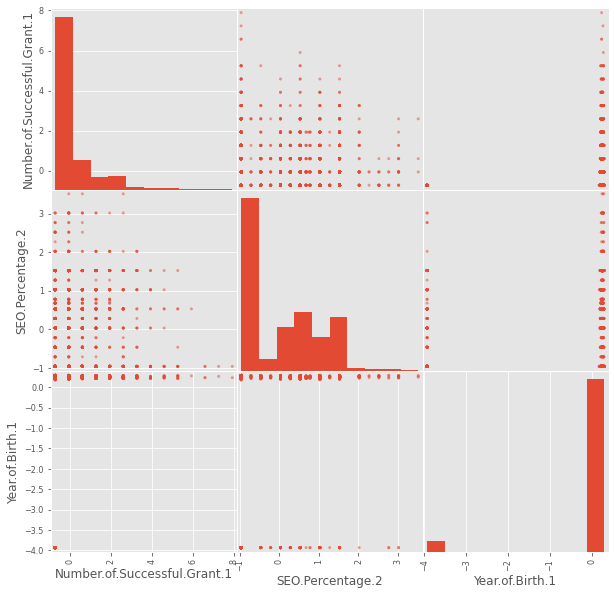

In [30]:
data_numeric_scaled = pd.DataFrame(x_train_real_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
pd.plotting.scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Как видно из графиков, мы не поменяли свойства признакового пространства: гистограммы распределений значений признаков, как и их scatter-plots, выглядят так же, как и до нормировки, но при этом все значения теперь находятся примерно в одном диапазоне, тем самым повышая интерпретабельность результатов, а также лучше сочетаясь с идеологией регуляризации.

In [31]:
x_train_real_scaled.mean(axis = 0)

array([ 2.29234621e-16,  6.25954315e-17,  1.94553368e-17,  8.45884209e-18,
       -1.35341473e-17,  1.17577905e-16, -2.53765263e-17, -5.07530526e-17,
        1.52259158e-17,  5.07530526e-18,  3.84877315e-17, -8.45884209e-17,
       -4.90612841e-17])

Значения средних теперь также не сильно отличаются

## Задание 4 Сравнение качества классификации до и после масштабирования вещественных признаков
1. Обучите ещё раз регрессию и гиперпараметры на новых признаках, объединив их с закодированными категориальными.
2. Проверьте, был ли найден оптимум accuracy по гиперпараметрам во время кроссвалидации.
3. Получите значение ROC AUC на тестовой выборке, сравните с лучшим результатом, полученными ранее.
4. Запишите полученный ответ в файл при помощи функции write_answer_2.

In [32]:
# Объединяем отмасштабированные признаки с категориальными
x_train_scaled = concat_samples_h(x_train_real_scaled, x_train_one_hot)
x_test_scaled = concat_samples_h(x_test_real_scaled, x_test_one_hot)

Лучшее сочетание параметров модели:
{'C': 0.05, 'solver': 'liblinear'}


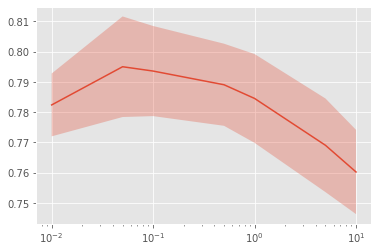

0.885044379082622


In [35]:
# Обучаем модель с масштабированными признаками

auc_after_scaling = fit_model_and_get_auc(x_train_scaled, y_train, x_test_scaled, y_test, grid_param = model_params)
print(auc_after_scaling)

In [37]:
print(f'AUC Without Scaling: {zero_auc}')
print(f'AUC After Scaling: {auc_after_scaling}')

AUC Without Scaling: 0.8843724749458951
AUC After Scaling: 0.885044379082622


In [38]:
# Сохраянем ответ
def write_answer_2(auc):
    with open("preprocessing_lr_answer2.txt", "w") as file:
        file.write(str(auc))
        
write_answer_2(auc_after_scaling)

## Балансировка классов

Алгоритмы классификации могут быть очень чувствительны к несбалансированным классам. Рассмотрим пример с выборками, сэмплированными из двух гауссиан. Их мат. ожидания и матрицы ковариации заданы так, что истинная разделяющая поверхность должна проходить параллельно оси x. Поместим в обучающую выборку 20 объектов, сэмплированных из 1-й гауссианы, и 10 объектов из 2-й. После этого обучим на них линейную регрессию, и построим на графиках объекты и области классификации.

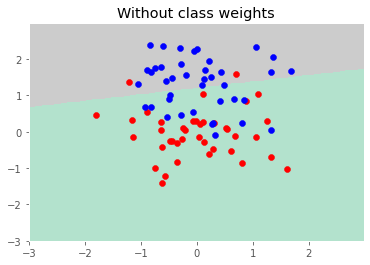

AUC: 0.911667


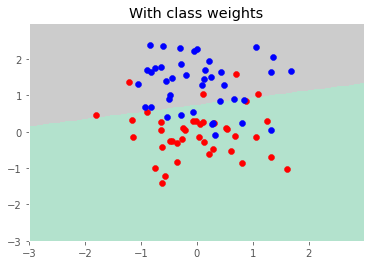

AUC: 0.906667


In [40]:
np.random.seed(0)
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

"""Сэмплируем данные из первой гауссианы"""
data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)

"""И из второй"""
data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)

"""На обучение берём 20 объектов из первого класса и 10 из второго"""
example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])

"""На тест - 20 из первого и 30 из второго"""
example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])

"""Задаём координатную сетку, на которой будем вычислять область классификации"""
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))

"""Обучаем LogisticRegression без балансировки по классам"""
optimizer = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)

"""Строим предсказания регрессии для сетки"""
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')

"""Считаем AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)

"""Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

Как видно, во втором случае классификатор находит разделяющую поверхность, которая ближе к истинной, т.е. меньше переобучается. Поэтому на сбалансированность классов в обучающей выборке всегда следует обращать внимание.

Посмотрим, сбалансированны ли классы в нашей обучающей выборке:

In [41]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


Видно, что нет.

Исправить ситуацию можно разными способами, мы рассмотрим два:
- давать объектам миноритарного класса больший вес при обучении классификатора (рассмотрен в примере выше)
- досэмплировать объекты миноритарного класса, пока число объектов в обоих классах не сравняется

## Задание 5 Балансировка классов
1. Обучите логистическую регрессию и гиперпараметры с балансировкой классов, используя веса (параметр ```class_weight='balanced'``` регрессии) на отмасштабированных выборках, полученных в предыдущем задании. **Убедитесь, что вы нашли максимум accuracy по гиперпараметрам.**
<br><br>
2. Получите метрику ```ROC AUC``` на тестовой выборке.
<br><br>
3. Сбалансируйте выборку, досэмплировав в неё объекты из меньшего класса. Для получения индексов объектов, которые требуется добавить в обучающую выборку, используйте следующую комбинацию вызовов функций:

```np.random.seed(0)```

```indices_to_add = np.random.randint(...)```

```X_train_to_add = X_train[y_train.as_matrix() == 1,:][indices_to_add,:]```
   
После этого добавьте эти объекты в начало или конец обучающей выборки. Дополните соответствующим образом вектор ответов.

4. Получите метрику ```ROC AUC``` на тестовой выборке, сравните с предыдущим результатом.
<br><br>
5. Внесите ответы в выходной файл при помощи функции ```write_asnwer_3```, передав в неё сначала ```ROC AUC``` для балансировки весами, а потом балансировки выборки вручную.

In [42]:
# Посмотрим на баланс классов в датасете (весь таргет)
y.value_counts()

0    3259
1    2741
Name: Grant.Status, dtype: int64

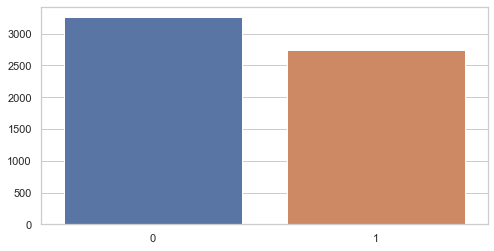

In [43]:
# Отрисуем
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize = (8,4))
sns.barplot(x = y.value_counts().index, y = y.value_counts().values);

Лучшее сочетание параметров модели:
{'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}


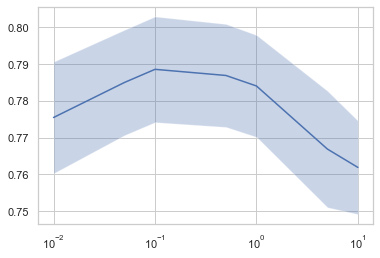

0.8871850681370189


In [45]:
# Обучим LogisticRegression c гиперпараметром, учитывающим балансировку классов (class_weight = 'balanced')
# Добавим данный параметр в сетку (model_params)

model_params = {
             'param_grid':{'solver': ['liblinear'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'class_weight': ['balanced']},
             'n_jobs': -1,
             'cv': 3
            }


auc_with_class_weight = fit_model_and_get_auc(x_train_scaled, y_train, x_test_scaled, y_test, grid_param = model_params)
print(auc_with_class_weight)

In [46]:
print(f'AUC After Scaling: {auc_after_scaling}')
print(f'AUC After Scaling and Turning On Model Parameter class_weight: {auc_with_class_weight}')

AUC After Scaling: 0.885044379082622
AUC After Scaling and Turning On Model Parameter class_weight: 0.8871850681370189


Заметно, что качество улучшилось. Теперь посмотрим как изменится качество при применении метода OverSampling 

Train Classes Balance:
0    2316
1    1884
Name: Grant.Status, dtype: int64

Test Classes Balance:
0    943
1    857
Name: Grant.Status, dtype: int64


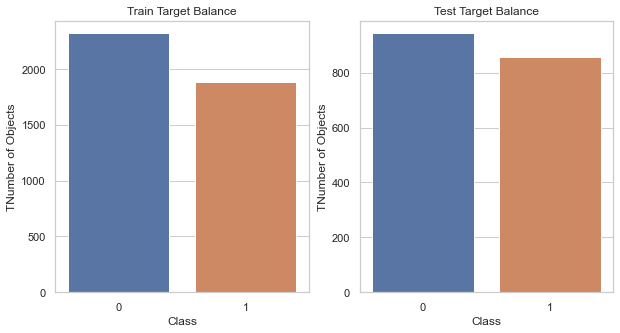

In [49]:
# Смотрим на баланс классов для y_train и y_test
class_balance_train = y_train.value_counts()
class_balance_test = y_test.value_counts()
print(f'Train Classes Balance:')
print(class_balance_train)
print()
print(f'Test Classes Balance:')
print(class_balance_test)

# Нарисуем для красоты
fig, axes = plt.subplots(nrows = 1 , ncols = 2, figsize = (10,5))
axes[0].set_title('Train Target Balance')
axes[1].set_title('Test Target Balance')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('TNumber of Objects')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('TNumber of Objects')

sns.barplot(x = class_balance_train.index, y = class_balance_train.values, ax = axes[0])
sns.barplot(x = class_balance_test.index, y = class_balance_test.values, ax = axes[1]);

In [50]:
# Cчитаем сколько надо добавить в минорный класс объектов
train_to_add = class_balance_train[0] - class_balance_train[1] 
test_to_add = class_balance_test[0] - class_balance_test[1] 
print(f'Add to Train: {train_to_add}\nAdd To Test: {test_to_add}')

# Досэмплируем y_train и y_test. Для начала объеденим x_train и y_train, x_test и y_test
x_y_train = concat_samples_h(x_train_scaled, y_train.values[:, np.newaxis])
x_y_test = concat_samples_h(x_test_scaled, y_test.values[:, np.newaxis])

# Минорный класс 1, отберем из train и test значения где y = 1
train_target_one = x_y_train[x_y_train[:, -1] == 1]
test_target_one = x_y_test[x_y_test[:, -1] == 1]

# Теперь, имея полную выборку, можем досемплировать train и test. Для этого случайно отберем объекты из класса 1 n раз
np.random.seed(0)

# Делаем OverSampling для train. Для этого лишь запомним индексы случайно выбранных объектов
train_indexes = []
for _ in range(train_to_add):
    indx = np.random.randint(0, train_target_one.shape[0])
    train_indexes.append(indx)
    
# Отберем случайно выбранные объекты из train_target_one
train_selected = train_target_one[train_indexes]

# Повторим для test
test_indexes = []
for _ in range(test_to_add):
    indx = np.random.randint(0, test_target_one.shape[0])
    test_indexes.append(indx)
    
test_selected = test_target_one[test_indexes]

# Сверим размерности случайно выбранных объектов
print()
print(f'Number of Randomly Generated Train Objects: {train_selected.shape[0]}')
print(f'Number of Randomly Generated Test Objects: {test_selected.shape[0]}')

Add to Train: 432
Add To Test: 86

Number of Randomly Generated Train Objects: 432
Number of Randomly Generated Test Objects: 86


In [52]:
# Теперь добавим случайно выбранные объекты в минорный класс (1) для train и test
x_y_train = np.vstack((x_y_train, train_selected))
x_y_test = np.vstack((x_y_test, test_selected))

# Обратно разделим выборки 
x_train, y_train = x_y_train[:, :-1], x_y_train[:,-1]
x_test, y_test = x_y_test[:, :-1], x_y_test[:,-1]

Train Classes Balance:
0.0    2316
1.0    2316
dtype: int64

Test Classes Balance:
1.0    943
0.0    943
dtype: int64


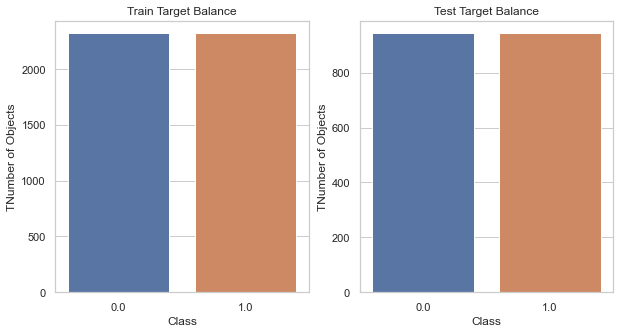

In [54]:
# Взглянем на баланс теперь
class_balance_train = pd.Series(y_train).value_counts()
class_balance_test = pd.Series(y_test).value_counts()

print(f'Train Classes Balance:')
print(class_balance_train)
print()
print(f'Test Classes Balance:')
print(class_balance_test)

# Нарисуем для красоты
fig, axes = plt.subplots(nrows = 1 , ncols = 2, figsize = (10,5))
axes[0].set_title('Train Target Balance')
axes[1].set_title('Test Target Balance')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('TNumber of Objects')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('TNumber of Objects')

sns.barplot(x = class_balance_train.index, y = class_balance_train.values, ax = axes[0])
sns.barplot(x = class_balance_test.index, y = class_balance_test.values, ax = axes[1]);

Лучшее сочетание параметров модели:
{'C': 1, 'solver': 'liblinear'}


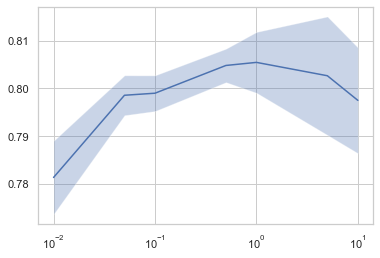

0.8826633485109344


In [57]:
# Обучим LogisticRegression после примения метода Oversampling
# Исключим параметр class_weight, т.к. классы уже сбалансированы

model_params = {
             'param_grid':{'solver': ['liblinear'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             'n_jobs': -1,
             'cv': 3
            }


auc_with_oversampling = fit_model_and_get_auc(x_train, y_train, x_test, y_test, grid_param = model_params)
print(auc_with_oversampling)

In [58]:
print(f'AUC After Scaling and Turning On Model Parameter class_weight: {auc_with_class_weight}')
print(f'AUC After Oversampling: {auc_with_oversampling}')

AUC After Scaling and Turning On Model Parameter class_weight: 0.8871850681370189
AUC After Oversampling: 0.8826633485109344


Качество модели после применеия OverSampling не сильно улучшилось, даже чуточку стало хуже

In [59]:
def write_answer_3(auc_1, auc_2):
    auc = (auc_1 + auc_2) / 2
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(str(auc))

write_answer_3(auc_with_class_weight, auc_with_oversampling)

## Стратификация выборок
Рассмотрим ещё раз пример с выборками из нормальных распределений. Посмотрим ещё раз на качество классификаторов, получаемое на тестовых выборках:

In [60]:
print('AUC ROC for classifier without weighted classes', auc_wo_class_weights)
print('AUC ROC for classifier with weighted classes: ', auc_w_class_weights)

AUC ROC for classifier without weighted classes 0.9116666666666666
AUC ROC for classifier with weighted classes:  0.9066666666666666


Насколько эти цифры реально отражают качество работы алгоритма, если учесть, что тестовая выборка так же несбалансирована, как обучающая? При этом мы уже знаем, что алгоритм логистический регрессии чувствителен к балансировке классов в обучающей выборке, т.е. в данном случае на тесте он будет давать заведомо заниженные результаты. Метрика классификатора на тесте имела бы гораздо больший смысл, если бы объекты были разделы в выборках поровну: по 20 из каждого класса на обучени и на тесте. Переформируем выборки и подсчитаем новые ошибки:

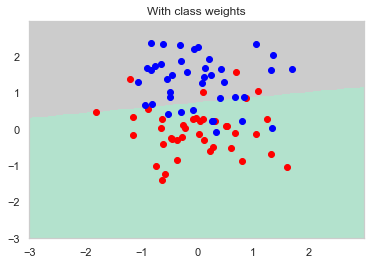

AUC ROC for stratified samples:  0.9125


In [61]:
"""Разделим данные по классам поровну между обучающей и тестовой выборками"""
example_data_train = np.vstack([data_0[:20,:], data_1[:20,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((20))])
example_data_test = np.vstack([data_0[20:,:], data_1[20:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((20))])

"""Обучим классификатор"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_stratified = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC ROC for stratified samples: ', auc_stratified)

Как видно, после данной процедуры ответ классификатора изменился незначительно, а вот качество увеличилось. При этом, в зависимости от того, как вы разбили изначально данные на обучение и тест, после сбалансированного разделения выборок итоговая метрика на тесте может как увеличиться, так и уменьшиться, но доверять ей можно значительно больше, т.к. она построена с учётом специфики работы классификатора. Данный подход является частным случаем т.н. метода стратификации.

## Задание 6 Стратификация выборки

1. По аналогии с тем, как это было сделано в начале задания, разбейте выборки ```x_real_zeros``` и ```x_cat_one_hot``` на обучение и тест, передавая в функцию ```train_test_split()``` дополнительно параметр ```stratify=y```. Также обязательно передайте в функцию переменную ```random_state=0```.
<br><br>
2. Выполните масштабирование новых вещественных выборок, обучите классификатор и его гиперпараметры при помощи метода кросс-валидации, делая поправку на несбалансированные классы при помощи весов. Убедитесь в том, что нашли оптимум accuracy по гиперпараметрам.
<br><br>
3. Оцените качество классификатора метрике AUC ROC на тестовой выборке.
<br><br>
4. Полученный ответ передайте функции ```write_answer_4```

In [69]:
# Осуществим стратифицированное разбиение
x_train_strat, x_test_strat, y_train_strat, y_test_strat = train_test_split(x_real_zeros, y, test_size = 0.3, random_state = 0, stratify = y)

# Только для категорий
x_train_one_hot_strat, x_test_one_hot_strat = train_test_split(x_cat_one_hot, test_size = 0.3, random_state = 0, stratify = y)

In [70]:
# Масштабируем признаки
scaler = StandardScaler()
x_train_scaled_strat = scaler.fit_transform(x_train_strat)
x_test_scaled_strat = scaler.transform(x_test_strat)
                                      
# Объединяем выборки
x_train_strat = concat_samples_h(x_train_scaled_strat, x_train_one_hot_strat)
x_test_strat = concat_samples_h(x_test_scaled_strat, x_test_one_hot_strat)

Лучшее сочетание параметров модели:
{'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}


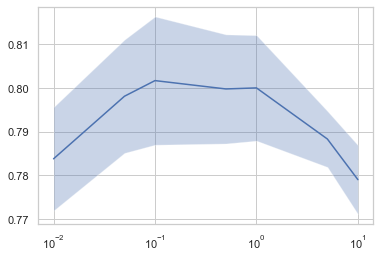

0.879348713049622


In [71]:
# Обучаем модель со стратифицированной выборкой

model_params = {
             'param_grid':{'solver': ['liblinear'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'class_weight': ['balanced']},
             'n_jobs': -1,
             'cv': 3
            }


auc_with_stratification = fit_model_and_get_auc(x_train_strat, y_train_strat, x_test_strat, y_test_strat, grid_param = model_params)
print(auc_with_stratification)

In [72]:
print(f'AUC After Scaling and Turning On Model Parameter class_weight: {auc_with_class_weight}')
print(f'AUC After Oversampling: {auc_with_oversampling}')
print(f'AUC After Stratification: {auc_with_stratification}')

AUC After Scaling and Turning On Model Parameter class_weight: 0.8871850681370189
AUC After Oversampling: 0.8826633485109344
AUC After Stratification: 0.879348713049622


Можно заметить, что стратификация показала себя лучше, чем OverSampling. Однако, самый лучший показатель качества пока был достигнут только изменение гиперпараметра ```class_weight```

In [73]:
def write_answer_4(auc):
    with open("preprocessing_lr_answer4.txt", "w") as file:
        file.write(str(auc))
        
write_answer_4(auc_with_stratification)

Теперь вы разобрались с основными этапами предобработки данных для линейных классификаторов.
Напомним основные этапы:
- обработка пропущенных значений
- обработка категориальных признаков
- стратификация
- балансировка классов
- масштабирование

Данные действия с данными рекомендуется проводить всякий раз, когда вы планируете использовать линейные методы. Рекомендация по выполнению многих из этих пунктов справедлива и для других методов машинного обучения.

## Трансформация признаков

Теперь рассмотрим способы преобразования признаков. Существует достаточно много различных способов трансформации признаков, которые позволяют при помощи линейных методов получать более сложные разделяющие поверхности. Самым базовым является полиномиальное преобразование признаков. Его идея заключается в том, что помимо самих признаков вы дополнительно включаете набор все полиномы степени $p$, которые можно из них построить. Для случая $p=2$ преобразование выглядит следующим образом:

$$ \phi(x_i) = [x_{i,1}^2, ..., x_{i,D}^2, x_{i,1}x_{i,2}, ..., x_{i,D} x_{i,D-1}, x_{i,1}, ..., x_{i,D}, 1] $$

Рассмотрим принцип работы данных признаков на данных, сэмплированных их гауссиан:

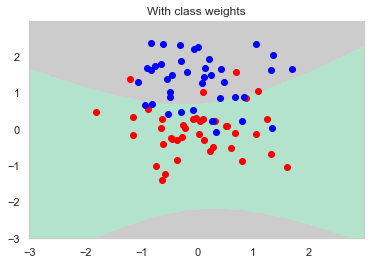

In [74]:
from sklearn.preprocessing import PolynomialFeatures

"""Инициализируем класс, который выполняет преобразование"""
transform = PolynomialFeatures(2)

"""Обучаем преобразование на обучающей выборке, применяем его к тестовой"""
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)

"""Обращаем внимание на параметр fit_intercept=False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

Видно, что данный метод преобразования данных уже позволяет строить нелинейные разделяющие поверхности, которые могут более тонко подстраиваться под данные и находить более сложные зависимости. Число признаков в новой модели:

In [75]:
print(example_data_train_poly.shape)

(40, 6)


Но при этом одновременно данный метод способствует более **сильной способности модели к переобучению из-за быстрого роста числа признаков** с увеличением степени $p$. Рассмотрим пример с $p=11$:

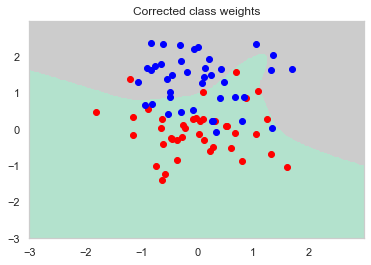

In [76]:
transform = PolynomialFeatures(11)
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('Corrected class weights')
plt.show()

Количество признаков в данной модели:

In [77]:
print(example_data_train_poly.shape)

(40, 78)


## Задание 7 Трансформация вещественных признаков

1. Реализуйте по аналогии с примером преобразование вещественных признаков модели при помощи полиномиальных признаков степени 2
<br><br>
2. Постройте логистическую регрессию на новых данных, одновременно подобрав оптимальные гиперпараметры. Обращаем внимание, что в преобразованных признаках **уже присутствует столбец, все значения которого равны 1**, поэтому обучать дополнительно значение $b$ не нужно, его функцию выполняет один из весов $w$. В связи с этим во избежание линейной зависимости в датасете, в вызов класса логистической регрессии требуется **передавать параметр** ```fit_intercept=False```. Для обучения используйте стратифицированные выборки с балансировкой классов при помощи весов, преобразованные признаки требуется заново отмасштабировать.
<br><br>
3. Получите AUC ROC на тесте и сравните данный результат с использованием обычных признаков.
<br><br>
4. Передайте полученный ответ в функцию ```write_answer_5```

In [78]:
# Осуществим стратифицированное разбиение
x_train_strat, x_test_strat, y_train_strat, y_test_strat = train_test_split(x_real_zeros, y, test_size = 0.3, random_state = 0, stratify = y)

# Только для категорий
x_train_one_hot_strat, x_test_one_hot_strat = train_test_split(x_cat_one_hot, test_size = 0.3, random_state = 0, stratify = y)

# Теперь применим полином только к вещественным признакам (n = 2)
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(2)
x_train_polynomial = polynomial.fit_transform(x_train_strat)
x_test_polynomial = polynomial.transform(x_test_strat)
print(f'Shape of x_train after creating polynomial: {x_train_polynomial.shape}')

Shape of x_train after creating polynomial: (4200, 105)


In [79]:
# Масштабируем признаки
scaler = StandardScaler()
scaler.fit(x_train_polynomial, y_train_strat)
x_train_poly_scaled = scaler.transform(x_train_polynomial)
x_test_poly_scaled = scaler.transform(x_test_polynomial)
                                      
# Объединяем выборки
x_train_poly = concat_samples_h(x_train_poly_scaled, x_train_one_hot_strat)
x_test_poly = concat_samples_h(x_test_poly_scaled, x_test_one_hot_strat)

Лучшее сочетание параметров модели:
{'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': False, 'solver': 'liblinear'}


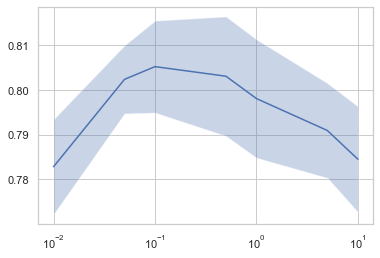

0.8869913025739008


In [80]:
# Обучаем модель

model_params = {
             'param_grid':{'solver': ['liblinear'],
                           'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                           'class_weight': ['balanced'],
                           'fit_intercept':[False]},
             'n_jobs': -1,
             'cv': 3
            }


auc_with_poly_features = fit_model_and_get_auc(x_train_poly, y_train_strat, x_test_poly, y_test_strat, grid_param = model_params)
print(auc_with_poly_features)

In [81]:
print(f'AUC After Scaling and Turning On Model Parameter class_weight: {auc_with_class_weight}')
print(f'AUC After Oversampling: {auc_with_oversampling}')
print(f'AUC After Stratification: {auc_with_stratification}')
print(f'AUC With Polynomial Features: {auc_with_poly_features}')

AUC After Scaling and Turning On Model Parameter class_weight: 0.8871850681370189
AUC After Oversampling: 0.8826633485109344
AUC After Stratification: 0.879348713049622
AUC With Polynomial Features: 0.8869913025739008


Полиномиальные признаки неплохи и улучшают качество модели

In [82]:
def write_answer_5(auc):
    with open("preprocessing_lr_answer5.txt", "w") as file:
        file.write(str(auc))
        
write_answer_5(auc_with_poly_features)

## Регрессия Lasso
К логистической регрессии также можно применить L1-регуляризацию (Lasso), вместо регуляризации L2, которая будет приводить к отбору признаков. Вам предлагается применить L1-регуляцию к исходным признакам и проинтерпретировать полученные результаты (применение отбора признаков к полиномиальным так же можно успешно применять, но в нём уже будет отсутствовать компонента интерпретации, т.к. смысловое значение оригинальных признаков известно, а полиномиальных - уже может быть достаточно нетривиально). 

Для вызова логистической регрессии с L1-регуляризацией достаточно передать параметр ```penalty='l1'``` в инициализацию класса.

## Задание 8 Отбор признаков при помощи регрессии Lasso
1. Обучите регрессию Lasso на стратифицированных отмасштабированных выборках, используя балансировку классов при помощи весов. Для задания используем ```x_train_real_zeros```
<br><br>
2. Получите ROC AUC регрессии, сравните его с предыдущими результатами
<br><br>
3. Найдите номера вещественных признаков, которые имеют нулевые веса в итоговой модели.
<br><br>
4. Передайте их список функции ```write_answer_6```

In [132]:
# Осуществим стратифицированное разбиение
x_train_strat, x_test_strat, y_train_strat, y_test_strat = train_test_split(x_real_zeros, y, test_size = 0.3, random_state = 0, stratify = y)

# Только для категорий
x_train_one_hot_strat, x_test_one_hot_strat = train_test_split(x_cat_one_hot, test_size = 0.3, random_state = 0, stratify = y)

In [133]:
# Масштабируем признаки
scaler = StandardScaler()
scaler.fit(x_train_strat, y_train_strat)

x_train_scaled_strat = scaler.transform(x_train_strat)
x_test_scaled_strat = scaler.transform(x_test_strat)
                                      
# Объединяем выборки
x_train = concat_samples_h(x_train_scaled_strat, x_train_one_hot_strat)
x_test = concat_samples_h(x_test_scaled_strat, x_test_one_hot_strat)

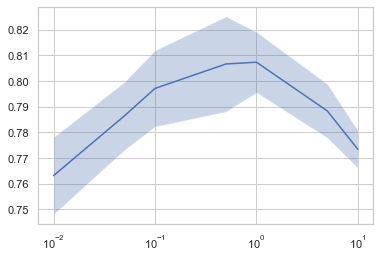

LogisticRegression(C=1, class_weight='balanced', fit_intercept=False,
                   penalty='l1', solver='liblinear')
{'C': 1}
0.8765076201991253


In [134]:
# Обучаем модель (необходимо будет получить доступ к признакам, поэтому не используем функцию)

model_params = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]} 

model = LogisticRegression(solver='liblinear', class_weight = 'balanced', penalty='l1')
grid_cv_lasso = GridSearchCV(model, model_params, cv = 3, n_jobs = -1)
grid_cv_lasso.fit(x_train, y_train_strat)

plot_scores(grid_cv_lasso)
print(grid_cv_lasso.best_estimator_)
print(grid_cv_lasso.best_params_)

auc_with_l1_norm = roc_auc_score(y_test_strat, grid_cv_lasso.best_estimator_.predict_proba(x_test)[:, 1])
print(auc_with_l1_norm)

In [135]:
# Всего признаков 
x_train.shape[1]

5606

In [138]:
zero_coef = [ indx for indx, value in enumerate(grid_cv_lasso.best_estimator_.coef_[0]) if value == 0]
print(f'Всего незначащих признаков: {len(zero_coef)}')
meaningful_features = x_train.shape[1] - len(zero_coef)
print(f'Число Значащих: {meaningful_features}')

Всего незначащих признаков: 5086
Число Значащих: 520


In [142]:
# Найдем незначащие среди вещественных
len_x_train_real = x_train_strat.shape[0]
print(f'Число вещественных признаков: {len_x_train_real}')
zero_coef = [ indx for indx, value in enumerate(grid_cv_lasso.best_estimator_.coef_[0][:len_x_train_real]) if value == 0]
print(f'Среди них незначащих: {len(zero_coef)}')

Число вещественных признаков: 4200
Среди них незначащих: 3844


In [145]:
def write_answer_6(features):
    with open("preprocessing_lr_answer6.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in features]))
        
write_answer_6(zero_coef)